In [33]:
!pip install gdown

Defaulting to user installation because normal site-packages is not writeable


In [34]:
import gdown
import pandas as pd
file_id =  "1i4ia9ZNfAXgu6JGTXCUgFn7Pb8wltzLH"
download_url = f"https://drive.google.com/uc?id={file_id}"
output_file = "acko_dataset.csv"
gdown.download(download_url, output_file, quiet=False)
data = pd.read_csv(output_file)

Downloading...
From (original): https://drive.google.com/uc?id=1i4ia9ZNfAXgu6JGTXCUgFn7Pb8wltzLH
From (redirected): https://drive.google.com/uc?id=1i4ia9ZNfAXgu6JGTXCUgFn7Pb8wltzLH&confirm=t&uuid=655418f0-b405-41bc-96c5-59f5d456f0bf
To: c:\Users\rajan\OneDrive\Python\Final_Project_NextLeap\acko_dataset.csv
100%|██████████| 219M/219M [00:40<00:00, 5.44MB/s] 


In [35]:
data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Woman,8.642140e+05,Spouse Present,1.0,Undergraduate,Business,26.598761,Tier-1,Premium,2.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,Detached Home,1945.913327
1,1,39.0,Woman,8.927012e+05,Spouse Present,3.0,Post Graduate,Missing,21.569731,Tier-2,Comprehensive,1.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,Detached Home,10908.896072
2,2,23.0,Man,2.201772e+06,Formerly Married,3.0,Undergraduate,Business,50.177549,Tier-3,Premium,1.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,Detached Home,21563.135198
3,3,21.0,Man,3.997542e+06,Spouse Present,2.0,Undergraduate,Missing,16.938144,Tier-2,Basic,1.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Flat,2653.539143
4,4,21.0,Man,3.409986e+06,Not Married,1.0,Undergraduate,Business,24.376094,Tier-2,Premium,0.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,Detached Home,1269.243463


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1200000 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            1200000 non-null  object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Credit Score          1062118 non-null  float64
 13  Insurance Duration    1199999 non-null  float64
 14  Policy Start Date     1200000 non-

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
def calcualte_info (parameters):
    a=parameters.mean()
    b=min(parameters)
    c=max(parameters)
    d=parameters.nunique()
    e=parameters.unique()
    print(f"Mean is: {a}")
    print(f"Minimum is: {b}")
    print(f"Maximum is: {c}")
    print(f"Unique count is: {d}")
    #pd.DataFrame(print(f"Unique value is: {e}"))
    pd.DataFrame(e)
    #return(a,b,c,d,e)
calcualte_info(data['Premium Amount'])

Mean is: 25763.41142394362
Minimum is: 292.65005896500105
Maximum is: 240000.0
Unique count is: 784492


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1200000 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            1200000 non-null  object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Credit Score          1062118 non-null  float64
 13  Insurance Duration    1199999 non-null  float64
 14  Policy Start Date     1200000 non-

In [40]:
# Count missing values in the 'ID' column
missing_count = data['Premium Amount'].isna().sum()

print(f"Number of missing values in 'Premium Amount' column: {missing_count}")


Number of missing values in 'Premium Amount' column: 415032


Data Cleanup:

1. Handling Missing Values

In [41]:
#Age 18,705 missing - moderate impact - replacing the missing data with median that would be less sensitive to outliers
data['Age'].fillna(data['Age'].median(), inplace=True)

#Annual Income 44,949 missing values - High Impact - replacing with median
data['Annual Income'].fillna(data.groupby('Occupation')['Annual Income'].transform('median'), inplace=True)

# Number of Dependents 109,672 missing - Moderate Impact - since this is discrete so replacing this by mode
data['Number of Dependents'].fillna(data['Number of Dependents'].mode()[0], inplace=True)

#Health Score 74,076 missing - High Impact
data['Health Score'].fillna(data.groupby('Age')['Health Score'].transform('median'), inplace=True)

#Previous Claims 364,029 missing  new customers with no claims history - High Impact - replacing nan with 0 assuming no claim
data['Previous Claims'].fillna(0, inplace=True)

#Credit Score (137,882 missing) - High Impact
data['Credit Score'].fillna(data['Credit Score'].median(), inplace= True)

#Customer Feedback 77,824 missing - Moderate Impact
data['Customer Feedback'].fillna('Unknown', inplace=True)

#Premium Amount 415,032 missing - CRITICAL Issue - estimated with other factors
data['Premium Amount'].fillna(data.groupby(['Policy Type', 'Age'])['Premium Amount'].transform('median'), inplace=True)

print(data.isnull().sum())



C:\Users\rajan\AppData\Local\Temp\ipykernel_12436\1048913003.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\rajan\AppData\Local\Temp\ipykernel_12436\1048913003.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

id                      0
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Credit Score            0
Insurance Duration      1
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
dtype: int64


2. Handling categorical Data

-Converting categorical variables into numerical values to be used in the pricing formula.

In [42]:
# Binary Encoding
data['Gender_Num'] = data['Gender'].map({'Woman': 0, 'Man': 1})
data['Smoking_Status_Num'] = data['Smoking Status'].map({'No': 0, 'Yes': 1})

# Ordinal Encoding
data['Education_Level_Num'] = data['Education Level'].map({'Secondary Education': 1, 'Undergraduate': 2, 'Post Graduate': 3, 'PhD': 4})
data['Exercise_Frequency_Num'] = data['Exercise Frequency'].map({'Rarely': 0, 'Monthly': 1, 'Weekly': 2, 'Daily': 3})
data['Customer_Feedback_Num'] = data['Customer Feedback'].map({'Poor': 0, 'Average': 1, 'Good': 2, 'Unknown': 1})

# Define mappings
occupation_mapping = {'Full-Time Worker': 3, 'Business': 2, 'Not Currently Working': 1, 'Missing': 0}
location_mapping = {'Tier-1': 3, 'Tier-2': 2, 'Tier-3': 1}
property_mapping = {'Detached Home': 3, 'Flat': 2, 'Apartment': 1}
policy_mapping = {'Basic': 1, 'Comprehensive': 2, 'Premium': 3}

# Apply ordinal encoding in new columns
data['Occupation_Num'] = data['Occupation'].map(occupation_mapping)
data['Location_Num'] = data['Location'].map(location_mapping)
data['Property_Type_Num'] = data['Property Type'].map(property_mapping)
data['Policy_Type_Num'] = data['Policy Type'].map(policy_mapping)


In [43]:
data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Premium Amount,Gender_Num,Smoking_Status_Num,Education_Level_Num,Exercise_Frequency_Num,Customer_Feedback_Num,Occupation_Num,Location_Num,Property_Type_Num,Policy_Type_Num
0,0,19.0,Woman,8.642140e+05,Spouse Present,1.0,Undergraduate,Business,26.598761,Tier-1,...,1945.913327,0,0,2,2,0,2,3,3,3
1,1,39.0,Woman,8.927012e+05,Spouse Present,3.0,Post Graduate,Missing,21.569731,Tier-2,...,10908.896072,0,1,3,1,1,0,2,3,2
2,2,23.0,Man,2.201772e+06,Formerly Married,3.0,Undergraduate,Business,50.177549,Tier-3,...,21563.135198,1,1,2,2,2,2,1,3,3
3,3,21.0,Man,3.997542e+06,Spouse Present,2.0,Undergraduate,Missing,16.938144,Tier-2,...,2653.539143,1,1,2,3,0,0,2,2,1
4,4,21.0,Man,3.409986e+06,Not Married,1.0,Undergraduate,Business,24.376094,Tier-2,...,1269.243463,1,1,2,2,0,2,2,3,3


3. Handling Outliers: handling the outliers here for better analysis

In [44]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Checking outliers for key numerical columns
outlier_columns = ['Age', 'Annual Income', 'Health Score', 'Credit Score', 'Premium Amount']
outliers = {col: detect_outliers_iqr(data, col) for col in outlier_columns}

# Count the number of outliers per column
outlier_counts = {col: len(outliers[col]) for col in outlier_columns}
print(outlier_counts)


{'Age': 0, 'Annual Income': 117342, 'Health Score': 0, 'Credit Score': 0, 'Premium Amount': 126512}


In [45]:
# Capping outliers
for col in outlier_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Apply capping
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])


Applying Min-Max Scaling in Code beacause this will help to Incorrect weightage for pricing model

In [46]:
#Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Define numerical columns from the original dataset
numerical_cols = ['Age', 'Annual Income', 'Health Score', 'Previous Claims', 'Credit Score', 'Premium Amount']

# Define encoded categorical columns (newly created)
encoded_cols = ['Gender_Num', 'Smoking_Status_Num', 'Education_Level_Num', 'Exercise_Frequency_Num', 
                'Customer_Feedback_Num', 'Occupation_Num', 'Location_Num', 'Property_Type_Num', 'Policy_Type_Num']

# Combine both lists for scaling
scale_cols = numerical_cols + encoded_cols

# Apply MinMax Scaling and store in new columns
data[[col + '_scaled' for col in scale_cols]] = scaler.fit_transform(data[scale_cols])



In [47]:
#cheking the missing value, data types and basic statistics such as scaling and outlier
# Check if any missing values remain
print(data.isnull().sum())

# Check the final dataset information
#
print(data.info())

# Display final dataset statistics
print(data.describe().T)

id                               0
Age                              0
Gender                           0
Annual Income                    0
Marital Status                   0
Number of Dependents             0
Education Level                  0
Occupation                       0
Health Score                     0
Location                         0
Policy Type                      0
Previous Claims                  0
Credit Score                     0
Insurance Duration               1
Policy Start Date                0
Customer Feedback                0
Smoking Status                   0
Exercise Frequency               0
Property Type                    0
Premium Amount                   0
Gender_Num                       0
Smoking_Status_Num               0
Education_Level_Num              0
Exercise_Frequency_Num           0
Customer_Feedback_Num            0
Occupation_Num                   0
Location_Num                     0
Property_Type_Num                0
Policy_Type_Num     

In [48]:
# Summarizing all columns
print("Dataset Overview:")
print(data.info())

# Checking missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())

# Statistical Summary of Numeric Columns
print("\nSummary Statistics:")
print(data.describe())

# Unique values in categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
print("\nUnique Values in Categorical Columns:")
for col in categorical_cols:
    print(f"{col}: {data[col].unique()}")


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 44 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   id                             1200000 non-null  int64  
 1   Age                            1200000 non-null  float64
 2   Gender                         1200000 non-null  object 
 3   Annual Income                  1200000 non-null  float64
 4   Marital Status                 1200000 non-null  object 
 5   Number of Dependents           1200000 non-null  float64
 6   Education Level                1200000 non-null  object 
 7   Occupation                     1200000 non-null  object 
 8   Health Score                   1200000 non-null  float64
 9   Location                       1200000 non-null  object 
 10  Policy Type                    1200000 non-null  object 
 11  Previous Claims                1200000 non-null  float64
 

clustered customers based on different conditions by segmenting them into Low Risk, Medium Risk, and High Risk based on multiple demographic attributes.

How We Clustered Customers Based on Conditions
Instead of using machine learning-based clustering (like K-Means), we defined logical rule-based clusters using key demographic factors:

Age: Older individuals are higher risk due to health factors.
Marital Status: Formerly married individuals tend to have higher financial instability.
Occupation: Those not working are at higher financial risk.
Location: Rural areas (Tier-3) have lower healthcare accessibility.
Each individual was assigned a score based on these factors, and then categorized into one of the three risk groups.

Clustering customers based on different conditions - Done
Identifying high-risk vs. low-risk customer categories - Done
Analysis on other key demographic conditions - Done

In [49]:
def categorize_risk_dynamic(row):
    risk_score = 0

    # Age-Based Health Score Impact
    if row['Health Score'] < 20:
        risk_score += 3 if row['Age'] > 50 else 2  # Higher weight for older individuals
    elif row['Health Score'] < 35:
        risk_score += 2 if row['Age'] > 50 else 1  

    # Credit Score Impact Based on Location
    if row['Credit Score'] < 450:
        risk_score += 3 if row['Location'] == 'Tier-1' else 2  # More severe for Tier-1
    elif row['Credit Score'] < 600:
        risk_score += 2 if row['Location'] == 'Tier-1' else 1  

    # Previous Claims Adjusted for Employment Status
    if row['Previous Claims'] >= 6:
        risk_score += 3 if row['Occupation'] == 'Not Currently Working' else 2
    elif row['Previous Claims'] >= 3:
        risk_score += 2 if row['Occupation'] == 'Not Currently Working' else 1

    # Smoking Risk Adjusted for Gender
    if row['Smoking Status'] == 'Yes':
        risk_score += 2 if row['Gender'] == 'Man' else 1  # Higher risk for men

    # Exercise Risk
    if row['Exercise Frequency'] == 'Rarely':
        risk_score += 2
    elif row['Exercise Frequency'] == 'Monthly':
        risk_score += 1

    # **Final Risk Categorization**
    if risk_score >= 6:
        return 'High Risk'
    elif risk_score >= 3:
        return 'Medium Risk'
    else:
        return 'Low Risk'

# Apply updated function
data['Risk Category'] = data.apply(categorize_risk_dynamic, axis=1)


# Display risk category distribution
print(data['Risk Category'].value_counts())



Risk Category
Medium Risk    695331
Low Risk       356986
High Risk      147683
Name: count, dtype: int64


Analysis on other key demographic conditions

Demographic_Risk_Category
Medium Risk    521418
High Risk      388428
Low Risk       290154
Name: count, dtype: int64


C:\Users\rajan\AppData\Local\Temp\ipykernel_12436\2789436090.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Demographic_Risk_Category', palette='coolwarm', order=['Low Risk', 'Medium Risk', 'High Risk'])


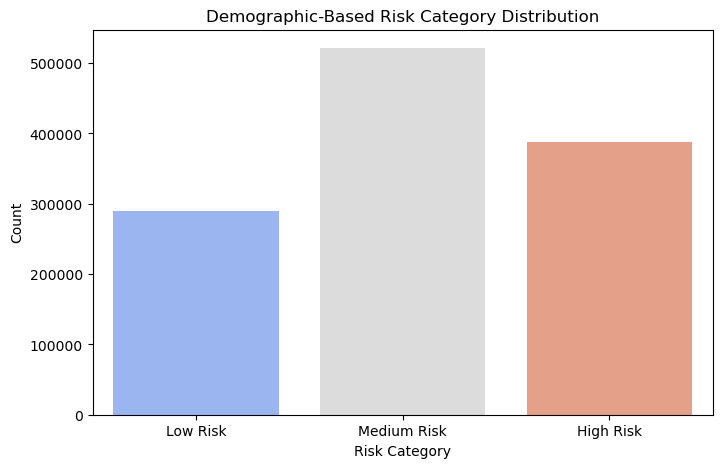

In [50]:
# Function to categorize risk based on multiple demographics
def categorize_risk(row):
    risk_score = 0

    # Age-based risk
    if row['Age'] >= 55:
        risk_score += 2  # High risk
    elif row['Age'] < 25:
        risk_score += 1  # Medium risk

    # Marital Status-based risk
    if row['Marital Status'] == 'Formerly Married':
        risk_score += 2
    elif row['Marital Status'] == 'Not Married':
        risk_score += 1

    # Occupation-based risk
    if row['Occupation'] == 'Not Currently Working':
        risk_score += 2
    elif row['Occupation'] == 'Business':
        risk_score += 1

    # Location-based risk
    if row['Location'] == 'Tier-3':
        risk_score += 2
    elif row['Location'] == 'Tier-2':
        risk_score += 1

    # Final risk classification
    if risk_score >= 4:
        return 'High Risk'
    elif 2 <= risk_score < 4:
        return 'Medium Risk'
    else:
        return 'Low Risk'

# Apply risk categorization
data['Demographic_Risk_Category'] = data.apply(categorize_risk, axis=1)

# Display risk category counts
demographic_risk_counts = data['Demographic_Risk_Category'].value_counts()
print(demographic_risk_counts)

# Plot Demographic-Based Risk Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='Demographic_Risk_Category', palette='coolwarm', order=['Low Risk', 'Medium Risk', 'High Risk'])
plt.title("Demographic-Based Risk Category Distribution")
plt.xlabel("Risk Category")
plt.ylabel("Count")
plt.show()


    2. Business Insights
Examining the correlation between premium and risk factors with key customer categories.
Analyzing premium distribution across different demographics.
Evaluating the impact of various features on premium pricing.
Etc.

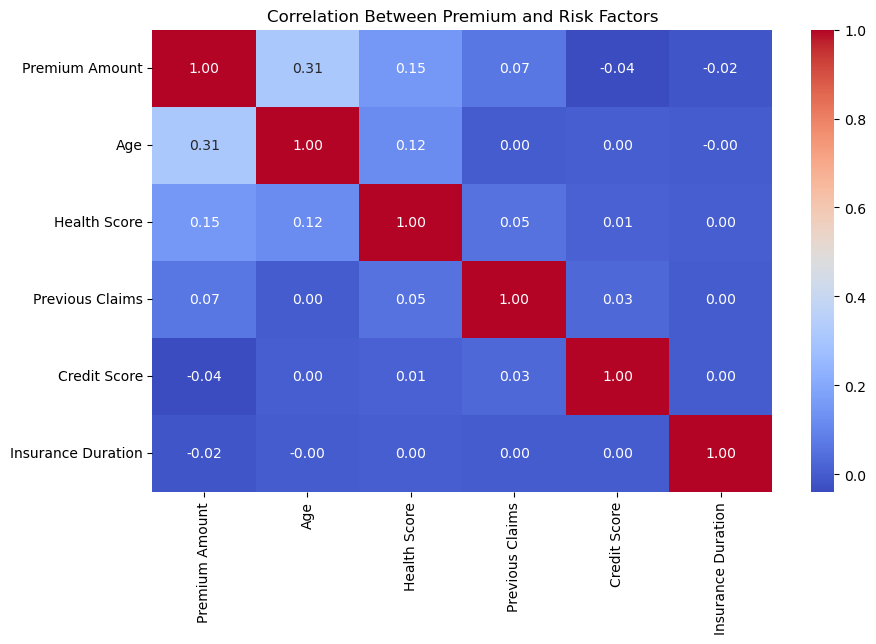

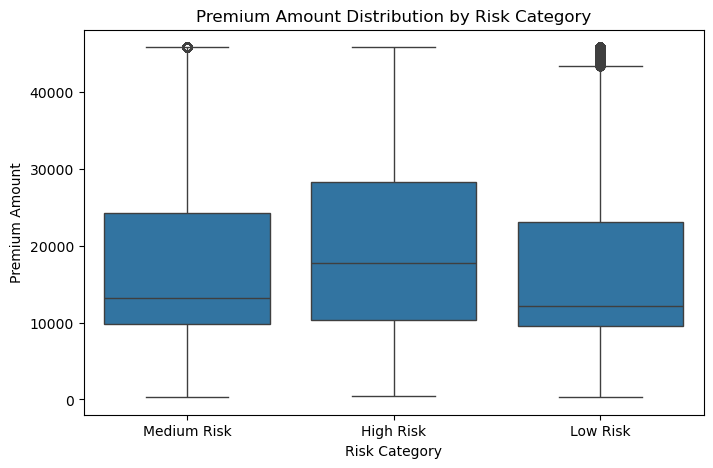

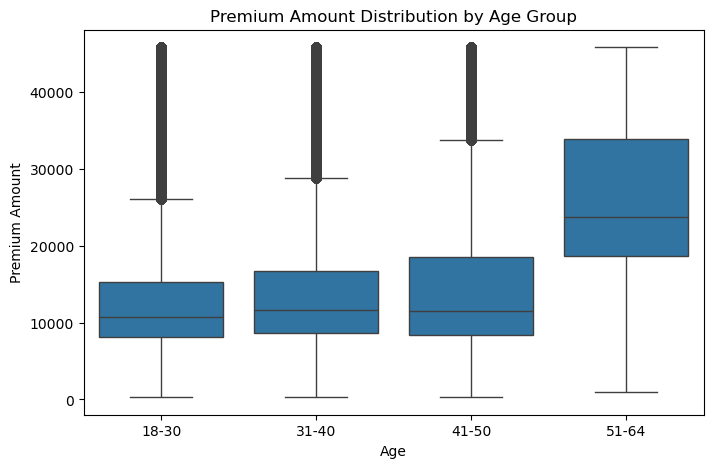

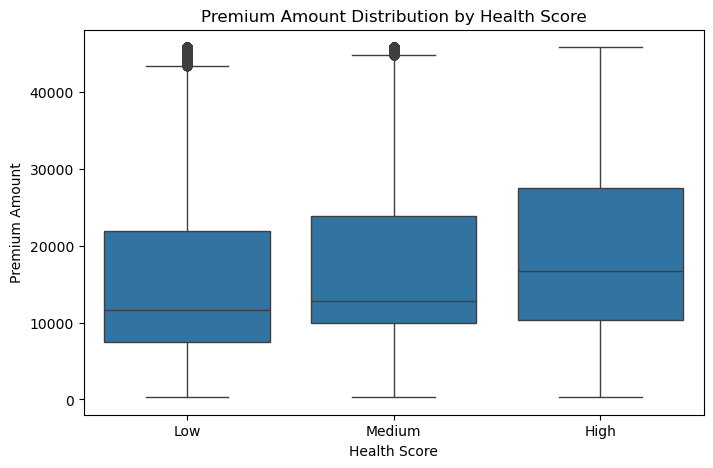

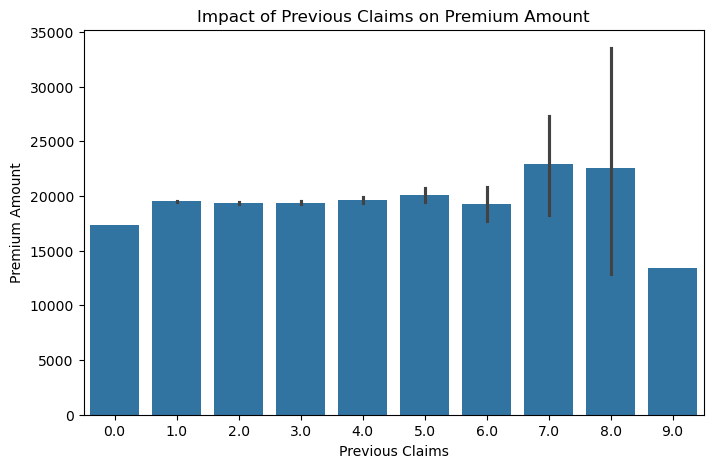

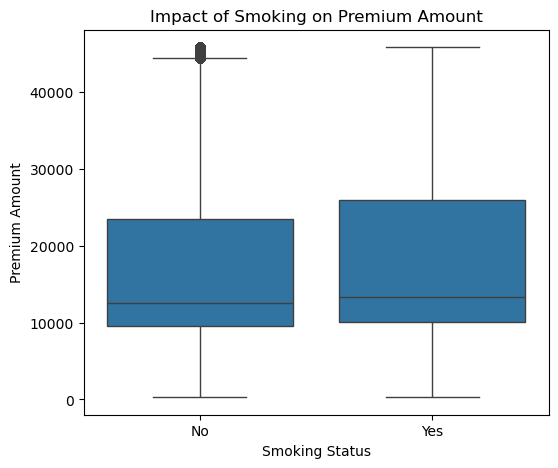

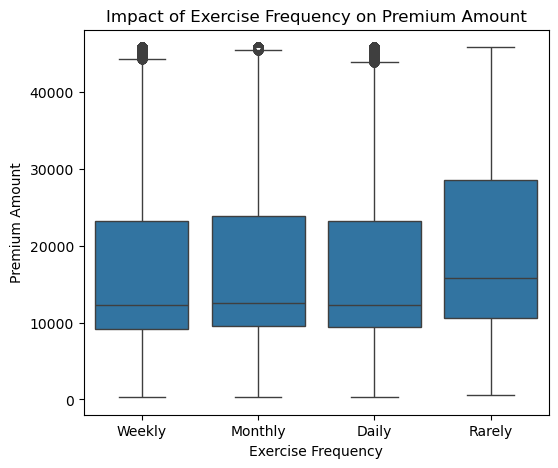

In [51]:
# Checking correlation between Premium Amount and other numerical features
correlation_matrix = data[['Premium Amount', 'Age', 'Health Score', 'Previous Claims', 'Credit Score', 'Insurance Duration']].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Premium and Risk Factors")
plt.show()

# -------------------------------
# 1. Premium Distribution Across Key Demographics
# -------------------------------

# Premium Distribution by Risk Category
plt.figure(figsize=(8, 5))
sns.boxplot(x='Risk Category', y='Premium Amount', data=data)
plt.title("Premium Amount Distribution by Risk Category")
plt.show()

# Premium Distribution by Age Group
plt.figure(figsize=(8, 5))
sns.boxplot(x=pd.cut(data['Age'], bins=[18, 30, 40, 50, 64], labels=['18-30', '31-40', '41-50', '51-64']), y='Premium Amount', data=data)
plt.title("Premium Amount Distribution by Age Group")
plt.show()

# Premium Distribution by Health Score
plt.figure(figsize=(8, 5))
sns.boxplot(x=pd.cut(data['Health Score'], bins=[0, 20, 40, 60], labels=['Low', 'Medium', 'High']), y='Premium Amount', data=data)
plt.title("Premium Amount Distribution by Health Score")
plt.show()

# -------------------------------
# 2. Feature Impact on Premium Pricing
# -------------------------------

# Impact of previous claims on premium
plt.figure(figsize=(8, 5))
sns.barplot(x='Previous Claims', y='Premium Amount', data=data)
plt.title("Impact of Previous Claims on Premium Amount")
plt.show()

# Impact of Smoking on Premium
plt.figure(figsize=(6, 5))
sns.boxplot(x='Smoking Status', y='Premium Amount', data=data)
plt.title("Impact of Smoking on Premium Amount")
plt.show()

# Impact of Exercise Frequency on Premium
plt.figure(figsize=(6, 5))
sns.boxplot(x='Exercise Frequency', y='Premium Amount', data=data)
plt.title("Impact of Exercise Frequency on Premium Amount")
plt.show()


C:\Users\rajan\AppData\Local\Temp\ipykernel_12436\1787455239.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit Score Bin", y="Premium Amount", data=data, palette="Blues")


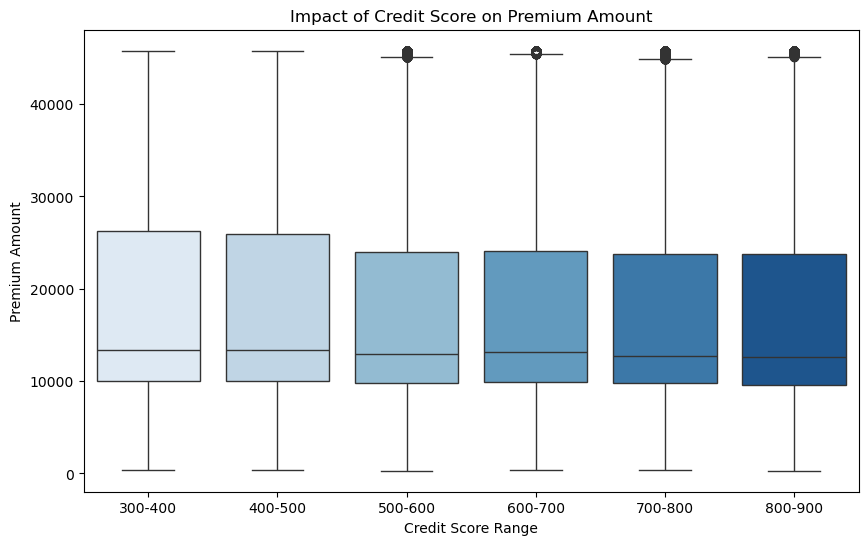

In [52]:
# Impact of Credit Score on Premium
# Create bins for Credit Score
data['Credit Score Bin'] = pd.cut(data['Credit Score'], bins=[300, 400, 500, 600, 700, 800, 900], labels=["300-400", "400-500", "500-600", "600-700", "700-800", "800-900"])

# Set figure size
plt.figure(figsize=(10, 6))

# Create a box plot
sns.boxplot(x="Credit Score Bin", y="Premium Amount", data=data, palette="Blues")

# Add labels and title
plt.xlabel("Credit Score Range")
plt.ylabel("Premium Amount")
plt.title("Impact of Credit Score on Premium Amount")

# Show the plot
plt.show()


Premium Pricing Model (Mathematical Formula & Business Logic)

In [53]:
#defining the base premium this would be the average premium in the dataset or determined based on policy type.

# Calculate the base premium using median to avoid skewing due to extreme values
base_premium = data["Premium Amount"].median()

print(f"Base Premium: {base_premium: .2f}")


Base Premium:  13148.35


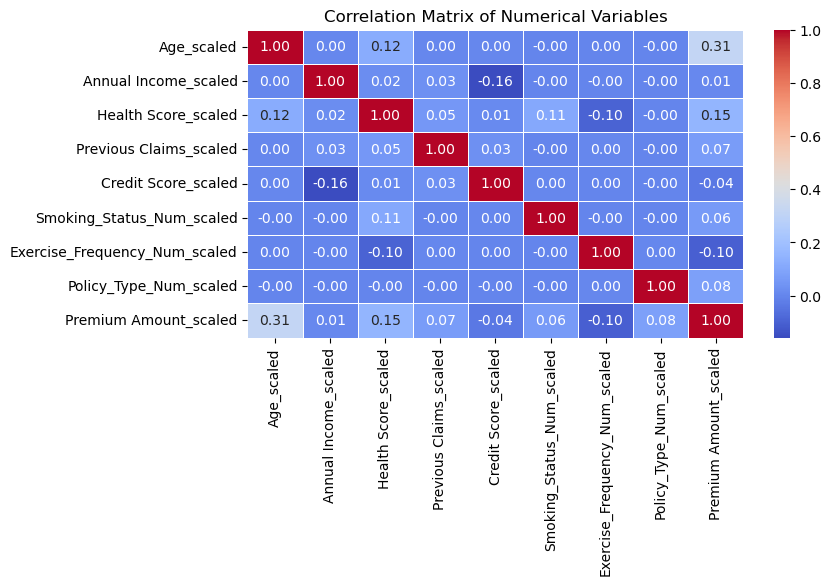

In [54]:
# Selecting only numerical scaled columns
numerical_cols = [
    "Age_scaled", "Annual Income_scaled", "Health Score_scaled", 
    "Previous Claims_scaled", "Credit Score_scaled", "Smoking_Status_Num_scaled", 
    "Exercise_Frequency_Num_scaled", "Policy_Type_Num_scaled", "Premium Amount_scaled"
]

# Computing correlation matrix
correlation_matrix = data[numerical_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

In [55]:
#Computing Risk-Adjusted Premium
# Define weights for each factor
weights = {
    "Age_scaled": 0.4,
    "Annual Income_scaled": 0.05,
    "Health Score_scaled": 0.2,
    "Previous Claims_scaled": 0.1,
    "Smoking_Status_Num_scaled": 0.1,
    "Policy_Type_Num_scaled": 0.1
}

# Calculate the risk adjustment
data["Risk Adjustment"] = (
    (data["Age_scaled"] * weights["Age_scaled"]) +
    (data["Annual Income_scaled"] * weights["Annual Income_scaled"]) +
    (data["Health Score_scaled"] * weights["Health Score_scaled"]) +
    (data["Previous Claims_scaled"] * weights["Previous Claims_scaled"]) +
    (data["Smoking_Status_Num_scaled"] * weights["Smoking_Status_Num_scaled"]) +
    (data["Policy_Type_Num_scaled"] * weights["Policy_Type_Num_scaled"])
)

# Calculate the final premium
data["Risk-Adjusted Premium"] = base_premium + data["Risk Adjustment"]

# Display first few rows
data[["Age_scaled", "Annual Income_scaled", "Health Score_scaled", "Previous Claims_scaled",
      "Smoking_Status_Num_scaled", "Policy_Type_Num_scaled", "Risk Adjustment", "Risk-Adjusted Premium"]].head()


,Age_scaled,Annual Income_scaled,Health Score_scaled,Previous Claims_scaled,Smoking_Status_Num_scaled,Policy_Type_Num_scaled,Risk Adjustment,Risk-Adjusted Premium
0,0.021739,0.209304,0.420201,0.222222,0.0,1.0,0.225423,13148.571693
1,0.456522,0.216203,0.332904,0.111111,1.0,0.5,0.421111,13148.767380
2,0.108696,0.533250,0.829496,0.111111,1.0,1.0,0.447151,13148.793420
3,0.065217,0.968172,0.252506,0.111111,1.0,0.0,0.236108,13148.582377
4,0.065217,0.825871,0.381618,0.000000,1.0,1.0,0.343704,13148.689973


In [63]:
# "Premium Amount_scaled" already exists, so we only scale "Risk-Adjusted Premium"
scaler = MinMaxScaler()
data['Risk-Adjusted Premium Scaled'] = scaler.fit_transform(data[['Risk-Adjusted Premium']])
data['Original Premium Scaled'] = scaler.fit_transform(data[['Premium Amount']])

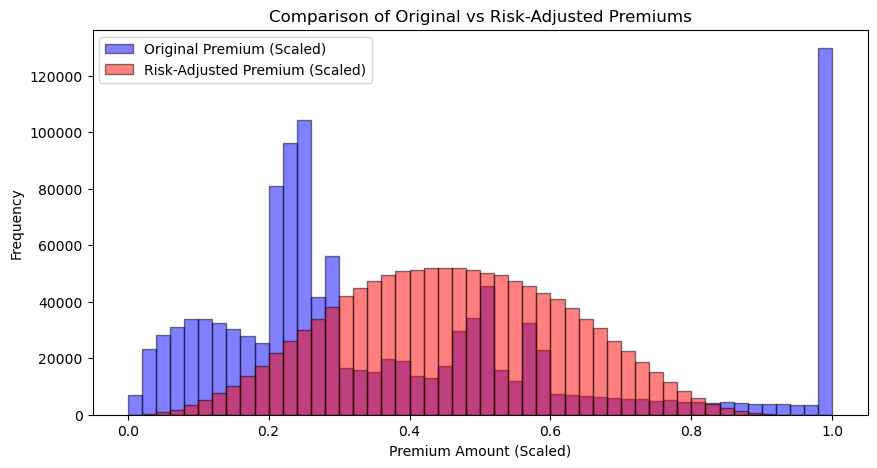

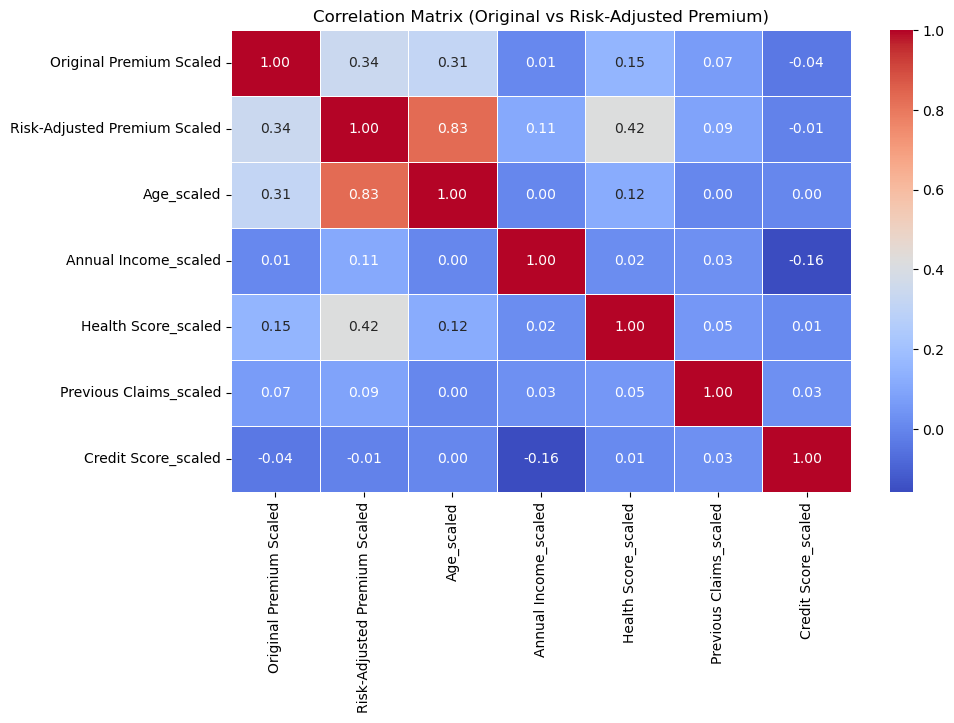

Original Premium (Scaled) Mean: 0.3952733279303732, Std Dev: 0.2849120832139474
Risk-Adjusted Premium (Scaled) Mean: 0.461780643896137, Std Dev: 0.16177192715327246


In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# --- STEP 1: REMOVE NON-NUMERIC COLUMNS ---
# Select only numerical columns (excluding non-numeric ones)
num_cols = data.select_dtypes(include=['float64', 'int64']).columns

# --- STEP 2: PLOT HISTOGRAM ---
plt.figure(figsize=(10, 5))
plt.hist(data["Original Premium Scaled"], bins=50, color='blue', alpha=0.5, edgecolor='black', label='Original Premium (Scaled)')
plt.hist(data["Risk-Adjusted Premium Scaled"], bins=50, color='red', alpha=0.5, edgecolor='black', label='Risk-Adjusted Premium (Scaled)')
plt.xlabel("Premium Amount (Scaled)")
plt.ylabel("Frequency")
plt.title("Comparison of Original vs Risk-Adjusted Premiums")
plt.legend()
plt.show()

# --- STEP 3: STANDARDIZE NUMERIC COLUMNS FOR CORRELATION ---
# Selecting relevant scaled columns for correlation
corr_cols = ["Original Premium Scaled", "Risk-Adjusted Premium Scaled", "Age_scaled", "Annual Income_scaled",
             "Health Score_scaled", "Previous Claims_scaled", "Credit Score_scaled"]

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data[corr_cols]), columns=corr_cols)

# --- STEP 4: PLOT CORRELATION MATRIX ---
plt.figure(figsize=(10, 6))
sns.heatmap(data_scaled.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Original vs Risk-Adjusted Premium)")
plt.show()

# --- STEP 5: DISPLAY STATISTICS ---
original_mean = data["Original Premium Scaled"].mean()
original_std = data["Original Premium Scaled"].std()
risk_adj_mean = data["Risk-Adjusted Premium Scaled"].mean()
risk_adj_std = data["Risk-Adjusted Premium Scaled"].std()

print(f"Original Premium (Scaled) Mean: {original_mean}, Std Dev: {original_std}")
print(f"Risk-Adjusted Premium (Scaled) Mean: {risk_adj_mean}, Std Dev: {risk_adj_std}")
